<a href="https://www.kaggle.com/code/sayedshaun/imdb-dataset-analysis?scriptVersionId=169271066" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/imdb-dataset-top-2000-movies/imdb_top_2000_movies.csv")
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN


## Drop Missing and Duplicates

In [3]:
df = df.dropna(subset="Gross").drop_duplicates(ignore_index=True)
df.isnull().sum() # We will not Work with Metascore so its ok not to take care about it

Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       33
Votes            0
Genre            0
Director         0
Cast             0
Gross            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    1903 non-null   object 
 1   Release Year  1903 non-null   object 
 2   Duration      1903 non-null   int64  
 3   IMDB Rating   1903 non-null   float64
 4   Metascore     1870 non-null   float64
 5   Votes         1903 non-null   object 
 6   Genre         1903 non-null   object 
 7   Director      1903 non-null   object 
 8   Cast          1903 non-null   object 
 9   Gross         1903 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 148.8+ KB


## Gross, Votes Can not be Object Lets convert it into Float

In [5]:
def to_numeric(x):
    valid = "0123456789."
    x = "".join(["" if i not in valid else i for i in x])
    return float(x) if x else None

df["Gross"] = df["Gross"].apply(to_numeric)
df["Votes"] = df["Votes"].apply(to_numeric)
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,2002655.0,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134.97
1,The Godfather Part II,1974,202,9.0,90.0,1358608.0,"Crime, Drama",Francis Ford Coppola,Al Pacino,57.30
2,Ordinary People,1980,124,7.7,86.0,56476.0,Drama,Robert Redford,Donald Sutherland,54.80
3,Lawrence of Arabia,1962,218,8.3,100.0,313044.0,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44.82
4,Close Encounters of the Third Kind,1977,138,7.6,90.0,216050.0,"Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,132.09


## Top 10 Movies By Category

In [6]:
def top_10_movies(column, df=df):
    data = df.sort_values(by=column, ascending=False, ignore_index=True)
    data = data[["Movie Name", column]].head(10)
    plt.figure(figsize=(9, 5))
    sns.barplot(data=data, x=column, y="Movie Name", palette="viridis")
    plt.title(f"Top 10 Movies By {column}")
    plt.tight_layout()
    plt.show()

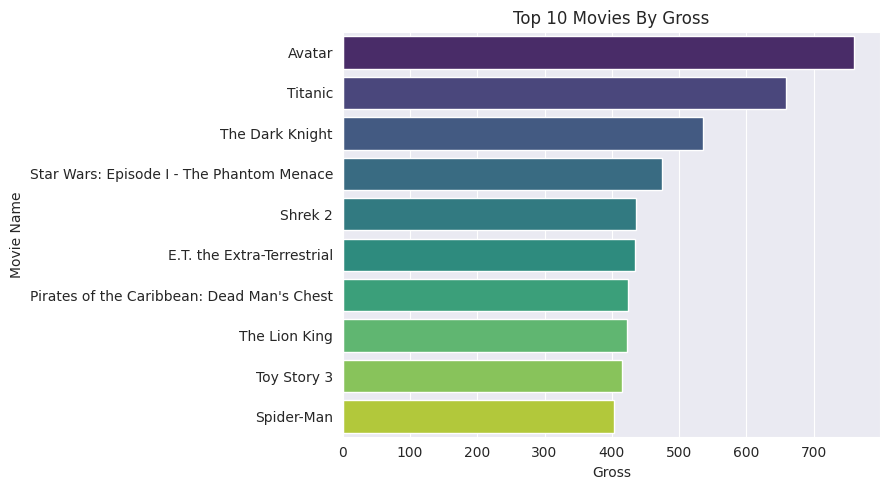

In [7]:
top_10_movies("Gross")

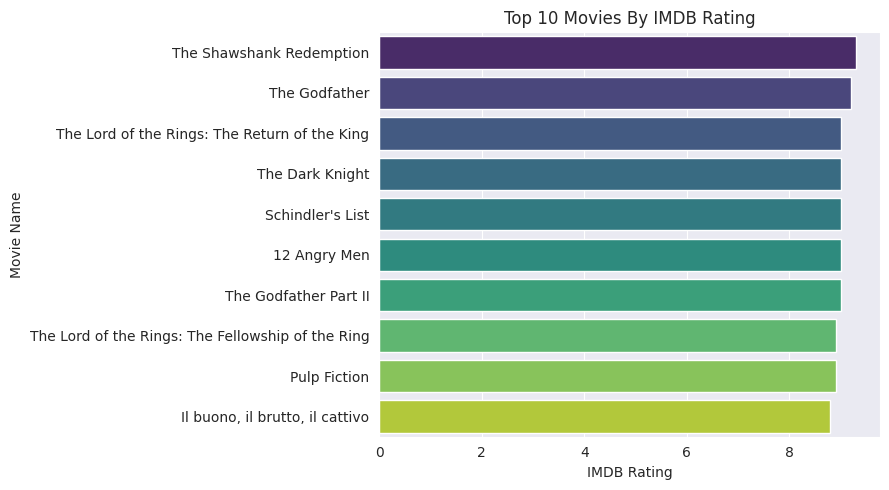

In [8]:
top_10_movies("IMDB Rating")

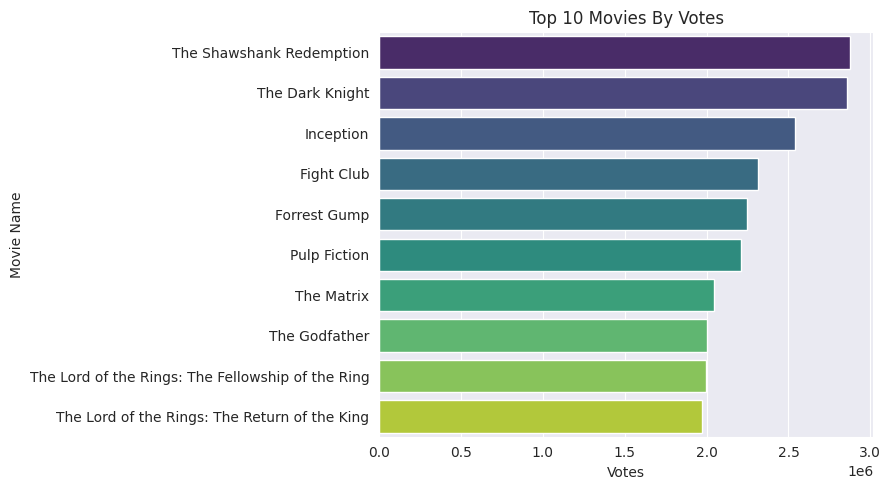

In [9]:
top_10_movies("Votes")

## Top 10 Categories By Gross

In [10]:
def top_10_by_category(column, df=df):
    data = df.groupby(column)["Gross"].sum()
    data = data.nlargest(10)
    plt.figure(figsize=(9, 5))
    sns.barplot(x=data.values, y=data.index, palette="viridis")
    plt.title(f"Top 10 {column} By Gross")
    plt.xlabel("Total Gross")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

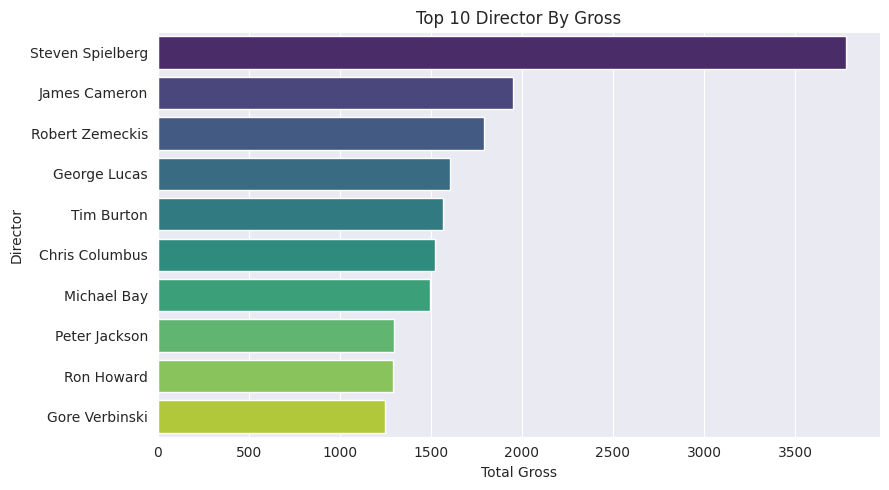

In [11]:
top_10_by_category("Director")

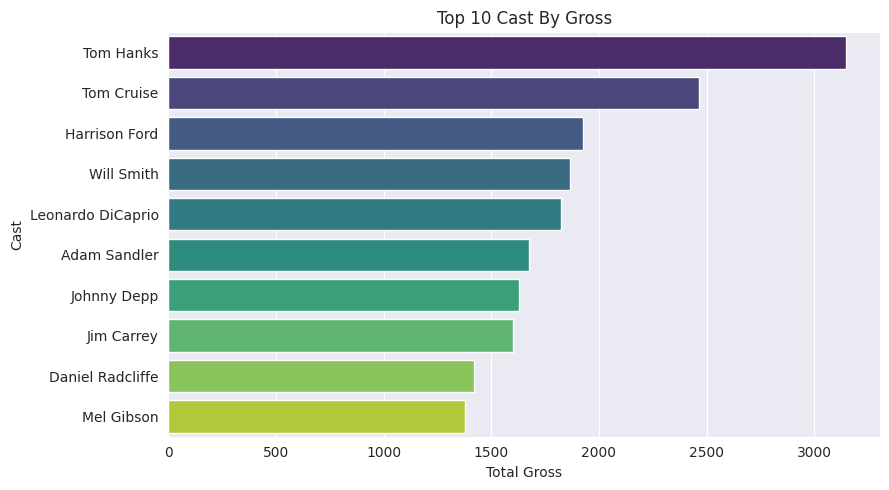

In [12]:
top_10_by_category("Cast")

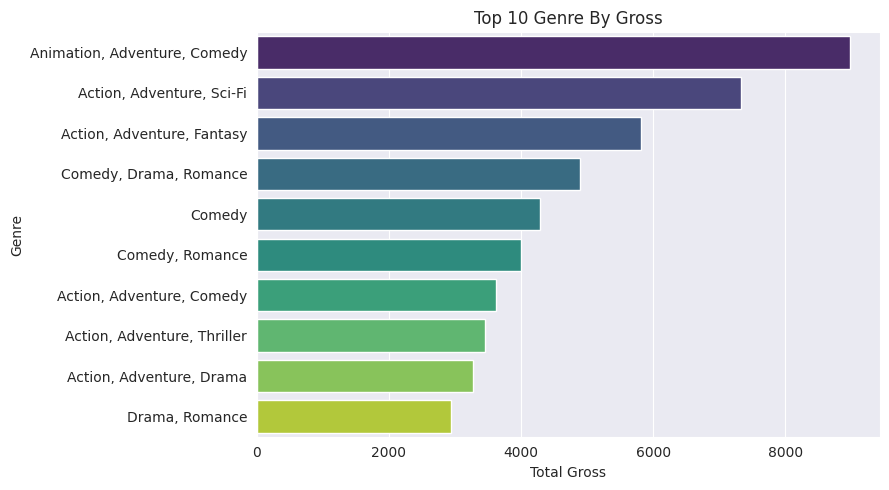

In [13]:
top_10_by_category("Genre")

## Top 10 Movies and Its Gross

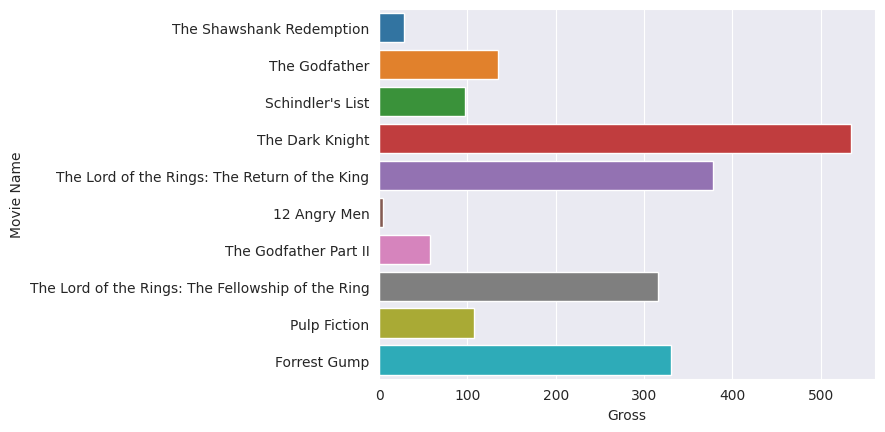

<Figure size 900x500 with 0 Axes>

In [14]:
top_movies = df[df["IMDB Rating"] > 8.5]    
top_movies = top_movies.sort_values(by="IMDB Rating", ascending=False, ignore_index=True)[["Movie Name", "Gross", "IMDB Rating",]]
top_movies_with_low_gross = top_movies.sort_values(by="IMDB Rating", ascending=False).head(10)
sns.barplot(data=top_movies_with_low_gross, x="Gross", y="Movie Name")
plt.figure(figsize=(9, 5))
plt.tight_layout()
plt.show()